<a href="https://colab.research.google.com/github/PhoenixChakraborty/IITK-Python-for-AI-ML-DL/blob/main/Proj_15_DeepLearning_CIFAR_10_Epoch_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


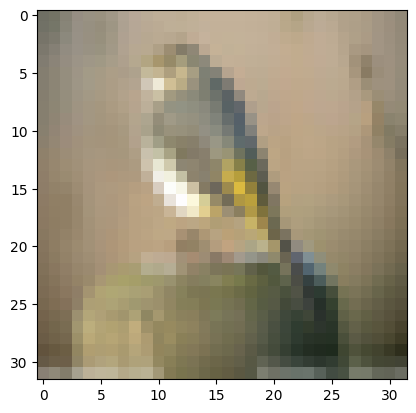

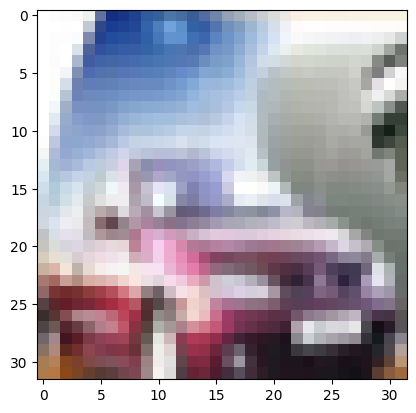

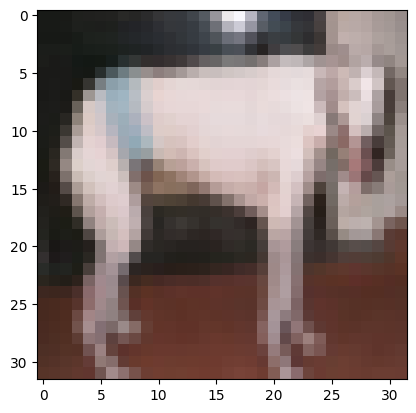

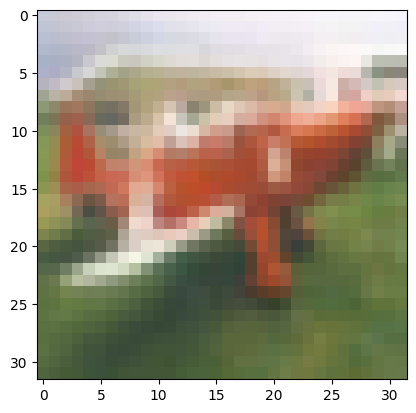

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.3266 - loss: 2.0421 - val_accuracy: 0.5027 - val_loss: 1.4262
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5603 - loss: 1.2275 - val_accuracy: 0.6251 - val_loss: 1.0488
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6454 - loss: 1.0185 - val_accuracy: 0.7060 - val_loss: 0.8299
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6925 - loss: 0.8907 - val_accuracy: 0.7084 - val_loss: 0.8573
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7190 - loss: 0.8191 - val_accuracy: 0.7479 - val_loss: 0.7399
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7414 - loss: 0.7530 - val_accuracy: 0.7569 - val_loss: 0.6972
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7585 - loss: 0.7031 - val_accuracy: 0.7679 - val_loss: 0.6945
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7695 - 

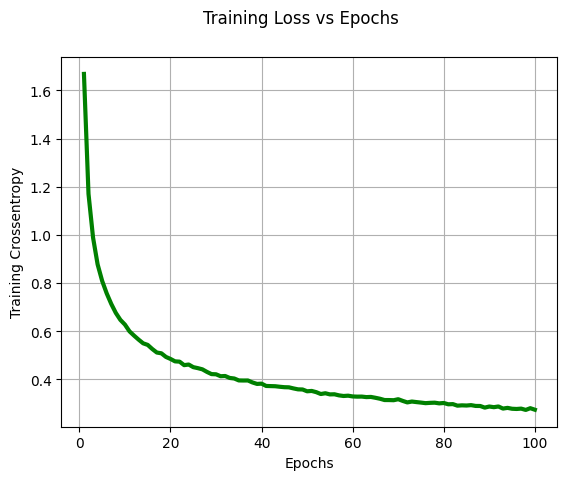

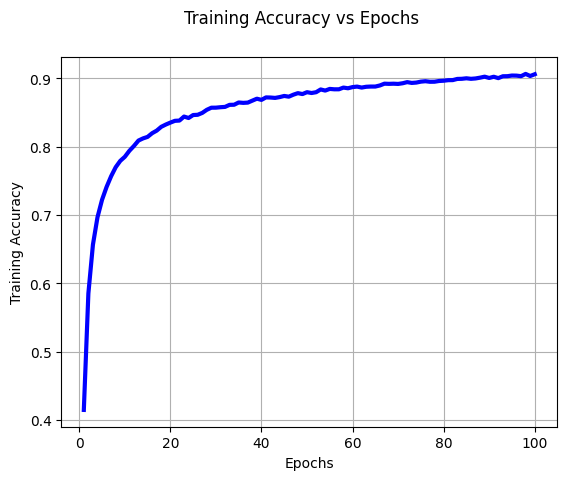

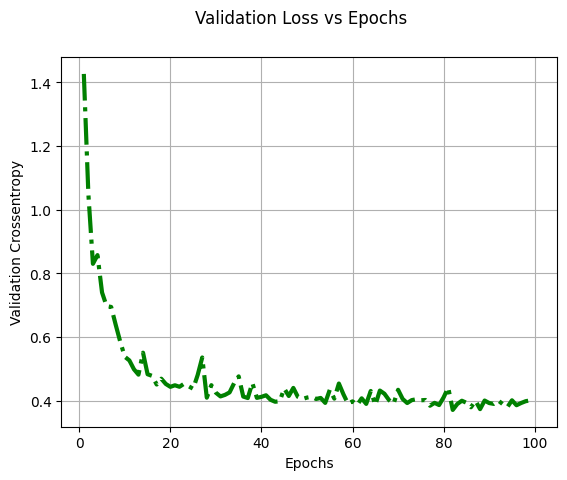

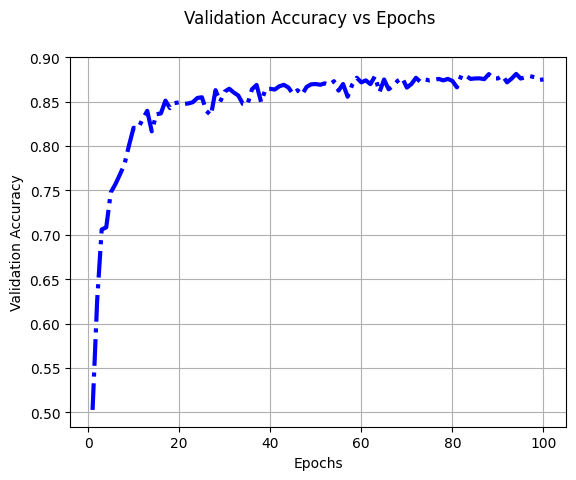

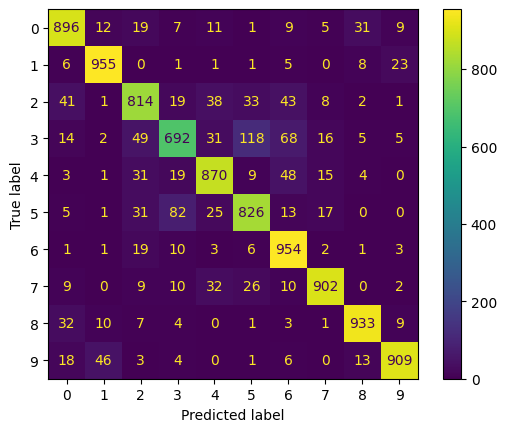

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

nc = 10 # Number of classes

#CIFAR is an acronym that stands for the Canadian
#Institute For Advanced Research and the CIFAR-10
#dataset was developed along with the CIFAR-100
#dataset by researchers at the CIFAR institute.

#The dataset is comprised of 60,000 32×32
#pixel color photographs of objects from 10 classes,
#such as frogs, birds, cats, ships, etc.
#The class labels and their standard associated
#integer values are listed below.

#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

##Batches 50k / 32

(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()
#Test train is auto inbuilt in this data set

#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

Xtrain = Xtrain.astype('float32')
#8 bit pixels with range from 0 to 255
Xtrain = Xtrain/ 255.0
#convert to to 0 to 1 data
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain, depth=nc)
#converting to onehot enconding
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)

model = Sequential ()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
#Kernel Size (3, 3) 3X3X3 (RGB) , Filter Size 32
model.add(BatchNormalization())
#change SD to 1 , Mean to 0
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#MaxPooling = Downsampling = Comression of data for efficiency
#by keeping the prominent features
model.add(Dropout (0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.5))

model.add(Conv2D(128, (3, 3), activation='relu', padding= 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout (0.5))

model.add (Flatten())
#add a vector of the final layer
model.add (Dense(128, activation='relu'))
model.add (BatchNormalization())
model.add (Dropout (0.5))
model.add (Dense(10, activation= 'softmax'))

# model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(Xtrain, ytrainEnc, epochs=100, validation_data=(Xtest, ytestEnc))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest))
#epoch change line

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()